# Stock Price Predictor
In this project I'll develop a model to predict stock prices. I'll be using data from Yahoo finance imported with the yfinance library. 

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
%matplotlib inline

In [2]:
stocks = input("Enter the code of the stock: ")
data = yf.download(stocks, "2010-01-01","2022-04-30", auto_adjust = True)
data.head()

Enter the code of the stock: USD
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2009-12-31,1.334896,1.348245,1.311731,1.312909,3960000
2010-01-04,1.343533,1.373372,1.334896,1.356489,6669600
2010-01-05,1.359238,1.371016,1.330969,1.351386,5421600
2010-01-06,1.349815,1.363556,1.335288,1.343533,7764000
2010-01-07,1.332148,1.340786,1.300739,1.322332,7135200


Gets data from January 1st 2010 to April 30 2022

In [3]:
data.shape


(3104, 5)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3104 entries, 2009-12-31 to 2022-04-29
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3104 non-null   float64
 1   High    3104 non-null   float64
 2   Low     3104 non-null   float64
 3   Close   3104 non-null   float64
 4   Volume  3104 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 145.5 KB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,3104.0,8.914260,1.099750e+01,0.931020,1.673117,3.707654,11.052606,5.667000e+01
High,3104.0,9.081325,1.124825e+01,0.938494,1.693350,3.760145,11.224185,5.841000e+01
Low,3104.0,8.711182,1.067998e+01,0.891294,1.652732,3.657881,10.870813,5.450000e+01
Close,3104.0,8.900411,1.096895e+01,0.901520,1.671725,3.715656,11.030323,5.622000e+01
Volume,3104.0,893414.143041,2.034526e+06,0.000000,89100.000000,178600.000000,465600.000000,2.080560e+07


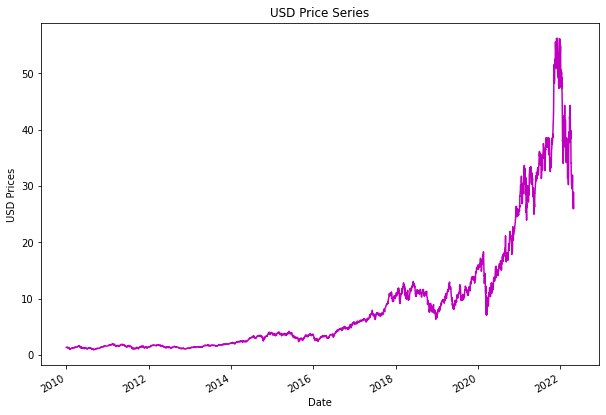

<Figure size 432x288 with 0 Axes>

In [6]:
data.Close.plot(figsize = (10, 7), color='m' )
plt.ylabel("{} Prices".format(stocks))
plt.title("{} Price Series".format(stocks))
plt.show()
plt.savefig("plot1.png")

In [7]:
data.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

<AxesSubplot:xlabel='Close', ylabel='Density'>

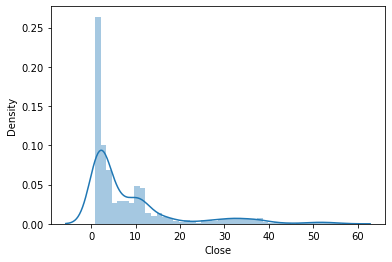

In [8]:
sns.distplot(data['Close'])

<AxesSubplot:xlabel='Open', ylabel='Density'>

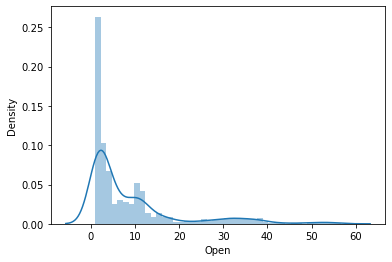

In [9]:
sns.distplot(data['Open'])

<AxesSubplot:xlabel='High', ylabel='Density'>

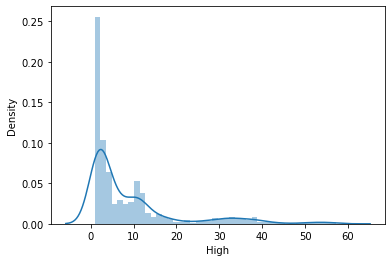

In [10]:
sns.distplot(data['High'])

We can see from the shape of the data and how the data is distributed that it is very non-linear

# Models to use:
Linear Regression, SVMs

In [11]:
X = data.drop("Close", axis = 1)
y = data.Close

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2483, 4)
(621, 4)
(2483,)
(621,)


In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
pred1 = linear_model.predict(X_test)

In [15]:
predictions = pd.DataFrame(pred1)
predictions.head()

,0
0,4.360106
1,10.723603
2,1.652604
3,1.217623
4,2.424552


In [16]:
y_test.head(5)

Date
2016-07-27     4.373410
2018-09-11    10.667235
2011-03-24     1.663919
2012-12-18     1.227824
2014-05-13     2.411169
Name: Close, dtype: float64

In [17]:
# Calculating the mean squared error and rmse and r2_score
from sklearn.metrics import r2_score, mean_squared_error
def calculate_metrics(y_test, pred1):
    """
    y_test = ground truth/ actual value
    y_pred = model predictions
    """
    mse = mean_squared_error(y_test, pred1)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, pred1)
    
    print("Mean Squared Error = ", mse)
    print("RMSE = ", rmse)
    print("R2_score = ", r2)

calculate_metrics(y_test, pred1)

Mean Squared Error =  0.04143297609215861
RMSE =  0.20355091768930597
R2_score =  0.9996073802075746


In [18]:
from sklearn.linear_model import Lasso, Ridge

lasso_model = Lasso().fit(X_train, y_train)
ridge_model= Ridge().fit(X_train, y_train)

lasso_pred = lasso_model.predict(X_test)
ridge_pred = ridge_model.predict(X_test)

In [19]:
calculate_metrics(y_test, lasso_pred)

Mean Squared Error =  0.11439010847426952
RMSE =  0.338216067735212
R2_score =  0.998916036817032


In [20]:
calculate_metrics(y_test, ridge_pred)

Mean Squared Error =  0.04133909125102469
RMSE =  0.20332016931683067
R2_score =  0.9996082698623934


In [21]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV


svr = SVR()

params = {"C": [0.1, 1, 10, 100, 1000],
         "gamma": [1, 0.1, 0.01, 0.001, 0.0001],
          "kernel": ['rbf']
         }
grid = GridSearchCV(SVR(), params, refit = True, verbose = 3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.210 total time=   0.6s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.226 total time=   0.5s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.206 total time=   0.5s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.193 total time=   0.4s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.237 total time=   0.6s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.201 total time=   0.5s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.217 total time=   0.6s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.197 total time=   0.4s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.182 total time=   0.6s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.228 total time=   0.5s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.196 total time=   0.9s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=rbf;

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.120 total time=   1.2s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.130 total time=   0.7s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.129 total time=   0.6s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.108 total time=   0.7s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.185 total time=   0.6s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.178 total time=   0.7s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.194 total time=   0.6s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.180 total time=   1.1s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.159 total time=   0.7s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.212 total time=   1.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.220 total time=   0.9s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.228 total time=   1.1s
[CV 4/5] END ....C=1000, gam

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [22]:
svr = SVR(C = 1000, gamma = 0.0001, kernel = 'rbf')
svr.fit(X_train, y_train)
svr_pred = svr.predict(X_test)
df = pd.DataFrame(svr_pred)

In [23]:
import joblib
joblib.dump(linear_model, 'linear_model.pkl')

['linear_model.pkl']

In [24]:
def predict_price(Open, High, Low, Volume):
    test_data = np.array([[Open, High, Low, Volume]])
    trained_model = joblib.load("linear_model.pkl")
    prediction = trained_model.predict(test_data)
    return prediction
    
predict_price(100,220,3400,30000)

array([3049.0177024])